In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import time

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# PART A

In [3]:
# Load the data
print("Loading the concrete dataset...")
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.head()

Loading the concrete dataset...


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(concrete_data.isnull().sum())


Checking for missing values:
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


In [5]:
# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(concrete_data.describe())


Basic statistics of the dataset:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000

In [6]:
# Separate the predictors and target variable
print("\nSeparating predictors and target variable...")
predictors = concrete_data.drop('Strength', axis=1)
target = concrete_data['Strength']


Separating predictors and target variable...


In [7]:
# Scale the data
print("\nScaling the data...")
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)


Scaling the data...


In [8]:

# Function to create and evaluate the model
def create_evaluate_model(predictors, target, num_iterations=50, epochs=50, test_size=0.3, hidden_layers=[10], activation='relu'):
    """
    Creates and evaluates a neural network model multiple times.
    
    Parameters:
    - predictors: Features dataset
    - target: Target variable
    - num_iterations: Number of times to train and evaluate the model
    - epochs: Number of training epochs
    - test_size: Proportion of data to use for testing
    - hidden_layers: List containing number of nodes in each hidden layer
    - activation: Activation function for hidden layers
    
    Returns:
    - mse_list: List of mean squared errors from each iteration
    """
    mse_list = []
    
    for i in range(num_iterations):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            predictors, target, test_size=test_size, random_state=i)
        
        # Create a model
        model = Sequential()
        
        # Add first hidden layer
        model.add(Dense(hidden_layers[0], activation=activation, input_dim=X_train.shape[1]))
        
        # Add additional hidden layers if specified
        for nodes in hidden_layers[1:]:
            model.add(Dense(nodes, activation=activation))
        
        # Add output layer
        model.add(Dense(1))
        
        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        
        # Make predictions
        predictions = model.predict(X_test, verbose=0)
        
        # Calculate the mean squared error
        mse = mean_squared_error(y_test, predictions)
        mse_list.append(mse)
        
        # Print progress
        if (i+1) % 10 == 0:
            print(f"Completed {i+1}/{num_iterations} iterations")
    
    return mse_list

In [ ]:
# Part A: Run baseline model
# -------------------------
print("\nPart A: Building baseline model with one hidden layer of 10 nodes, ReLU activation, and 50 epochs")
print("Running 50 iterations of train-test split, model training, and evaluation...")

start_time = time.time()
mse_part_a = create_evaluate_model(
    predictors_scaled, 
    target, 
    num_iterations=50, 
    epochs=50, 
    hidden_layers=[10], 
    activation='relu'
)
end_time = time.time()


Part A: Building baseline model with one hidden layer of 10 nodes, ReLU activation, and 50 epochs
Running 50 iterations of train-test split, model training, and evaluation...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 10/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 20/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 30/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 40/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 50/50 iterations


In [11]:
# Calculate and print the mean and standard deviation of MSEs
mean_mse_a = np.mean(mse_part_a)
std_mse_a = np.std(mse_part_a)
print("\nPart A Results:")
print(f"Time taken: {end_time - start_time:.2f} seconds")
print(f"Mean of MSE: {mean_mse_a:.4f}")
print(f"Standard Deviation of MSE: {std_mse_a:.4f}")


Part A Results:
Time taken: 60.23 seconds
Mean of MSE: 352.7750
Standard Deviation of MSE: 76.3181


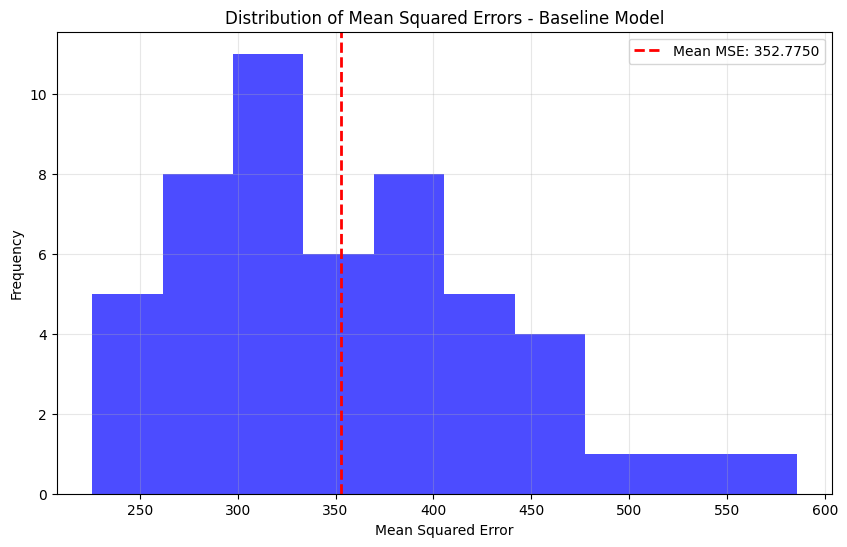

In [12]:
# Visualize the distribution of MSEs
plt.figure(figsize=(10, 6))
plt.hist(mse_part_a, bins=10, alpha=0.7, color='blue')
plt.axvline(x=mean_mse_a, color='red', linestyle='--', linewidth=2, label=f'Mean MSE: {mean_mse_a:.4f}')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Squared Errors - Baseline Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Display individual MSE values for reference
print("\nIndividual MSE values for all 50 iterations:")
for i, mse in enumerate(mse_part_a):
    print(f"Iteration {i+1}: MSE = {mse:.4f}")


Individual MSE values for all 50 iterations:
Iteration 1: MSE = 287.2309
Iteration 2: MSE = 379.5514
Iteration 3: MSE = 444.6236
Iteration 4: MSE = 306.7371
Iteration 5: MSE = 451.1948
Iteration 6: MSE = 421.0619
Iteration 7: MSE = 421.9166
Iteration 8: MSE = 276.7658
Iteration 9: MSE = 271.3126
Iteration 10: MSE = 232.7168
Iteration 11: MSE = 445.2631
Iteration 12: MSE = 406.1636
Iteration 13: MSE = 274.7785
Iteration 14: MSE = 385.4344
Iteration 15: MSE = 270.2705
Iteration 16: MSE = 353.1829
Iteration 17: MSE = 338.9566
Iteration 18: MSE = 308.6045
Iteration 19: MSE = 300.6735
Iteration 20: MSE = 327.8101
Iteration 21: MSE = 511.2762
Iteration 22: MSE = 297.3528
Iteration 23: MSE = 404.6979
Iteration 24: MSE = 349.5819
Iteration 25: MSE = 244.2483
Iteration 26: MSE = 322.8678
Iteration 27: MSE = 338.2313
Iteration 28: MSE = 585.6803
Iteration 29: MSE = 355.8763
Iteration 30: MSE = 389.3911
Iteration 31: MSE = 371.6759
Iteration 32: MSE = 330.3971
Iteration 33: MSE = 332.8867
Iterat

In [14]:
# Summary of findings
print("\n=== Part A: Summary ===")
print("- Built a baseline neural network with a single hidden layer of 10 nodes and ReLU activation")
print("- Optimizer: Adam, Loss function: Mean Squared Error")
print("- Training process: 50 epochs, 30% test data split")
print("- Repeated the entire process 50 times with different random splits")
print(f"- Average MSE across all iterations: {mean_mse_a:.4f}")
print(f"- Standard deviation of MSEs: {std_mse_a:.4f}")
print("- This baseline model provides a reference point for future model improvements")


=== Part A: Summary ===
- Built a baseline neural network with a single hidden layer of 10 nodes and ReLU activation
- Optimizer: Adam, Loss function: Mean Squared Error
- Training process: 50 epochs, 30% test data split
- Repeated the entire process 50 times with different random splits
- Average MSE across all iterations: 352.7750
- Standard deviation of MSEs: 76.3181
- This baseline model provides a reference point for future model improvements


# PART B

In [15]:
print("\nPart B: Building model with normalized data, one hidden layer of 10 nodes, ReLU activation, and 50 epochs")
print("Running 50 iterations of train-test split, model training, and evaluation...")


Part B: Building model with normalized data, one hidden layer of 10 nodes, ReLU activation, and 50 epochs
Running 50 iterations of train-test split, model training, and evaluation...


In [ ]:
# Function to create and evaluate the model
def create_evaluate_model(predictors, target, num_iterations=50, epochs=50, test_size=0.3, hidden_layers=[10], activation='relu', normalize=False):
    """
    Creates and evaluates a neural network model multiple times.
    
    Parameters:
    - predictors: Features dataset
    - target: Target variable
    - num_iterations: Number of times to train and evaluate the model
    - epochs: Number of training epochs
    - test_size: Proportion of data to use for testing
    - hidden_layers: List containing number of nodes in each hidden layer
    - activation: Activation function for hidden layers
    - normalize: Whether to normalize the data
    
    Returns:
    - mse_list: List of mean squared errors from each iteration
    """
    mse_list = []
    
    for i in range(num_iterations):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            predictors, target, test_size=test_size, random_state=i)
        
        # Normalize the data if specified
        if normalize:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        
        # Create a model
        model = Sequential()
        
        # Add first hidden layer
        model.add(Dense(hidden_layers[0], activation=activation, input_dim=X_train.shape[1]))
        
        # Add additional hidden layers if specified
        for nodes in hidden_layers[1:]:
            model.add(Dense(nodes, activation=activation))
        
        # Add output layer
        model.add(Dense(1))
        
        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        
        # Make predictions
        predictions = model.predict(X_test, verbose=0)
        
        # Calculate the mean squared error
        mse = mean_squared_error(y_test, predictions)
        mse_list.append(mse)
        
        # Print progress
        if (i+1) % 10 == 0:
            print(f"Completed {i+1}/{num_iterations} iterations")
    
    return mse_list

In [18]:
start_time = time.time()
mse_part_b = create_evaluate_model(
    predictors, 
    target, 
    num_iterations=50, 
    epochs=50, 
    hidden_layers=[10], 
    activation='relu',
    normalize=True
)
end_time = time.time()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 10/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 20/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 30/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 40/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 50/50 iterations


In [19]:
# Calculate and print the mean and standard deviation of MSEs
mean_mse_b = np.mean(mse_part_b)
std_mse_b = np.std(mse_part_b)

print("\nPart B Results:")
print(f"Time taken: {end_time - start_time:.2f} seconds")
print(f"Mean of MSE: {mean_mse_b:.4f}")
print(f"Standard Deviation of MSE: {std_mse_b:.4f}")


Part B Results:
Time taken: 60.25 seconds
Mean of MSE: 340.1712
Standard Deviation of MSE: 97.7738


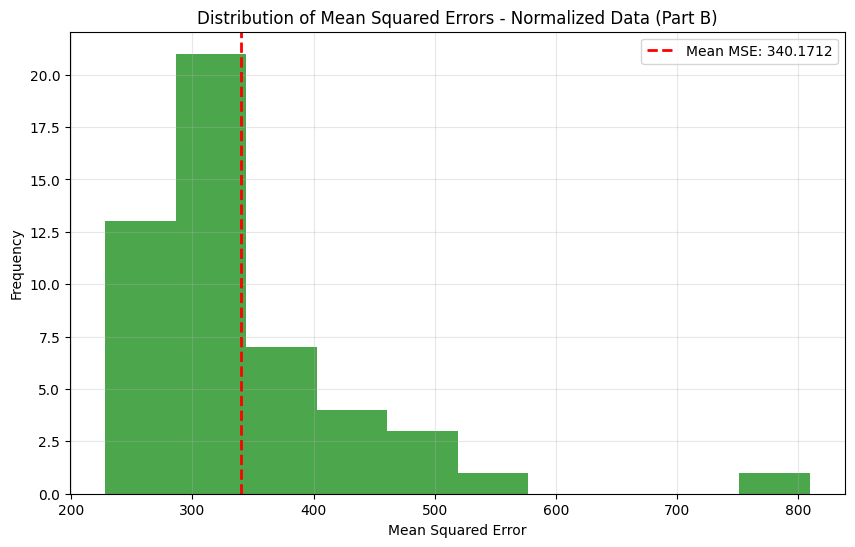

In [20]:
# Visualize the distribution of MSEs for Part B
plt.figure(figsize=(10, 6))
plt.hist(mse_part_b, bins=10, alpha=0.7, color='green')
plt.axvline(x=mean_mse_b, color='red', linestyle='--', linewidth=2, label=f'Mean MSE: {mean_mse_b:.4f}')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Squared Errors - Normalized Data (Part B)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

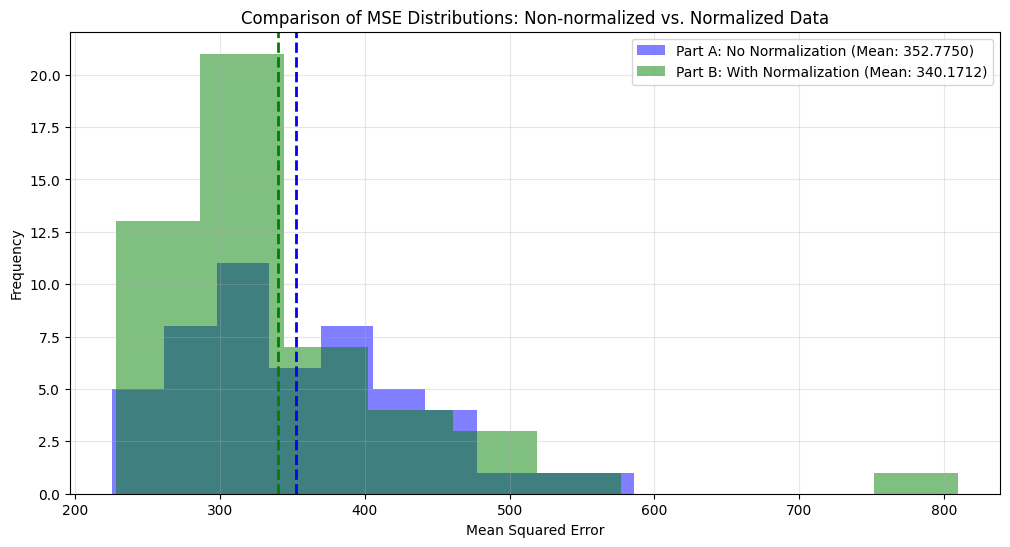

In [21]:
# Compare Part A and Part B
plt.figure(figsize=(12, 6))
plt.hist(mse_part_a, bins=10, alpha=0.5, color='blue', label=f'Part A: No Normalization (Mean: {mean_mse_a:.4f})')
plt.hist(mse_part_b, bins=10, alpha=0.5, color='green', label=f'Part B: With Normalization (Mean: {mean_mse_b:.4f})')
plt.axvline(x=mean_mse_a, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=mean_mse_b, color='green', linestyle='--', linewidth=2)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Comparison of MSE Distributions: Non-normalized vs. Normalized Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Calculate improvement percentage
improvement = ((mean_mse_a - mean_mse_b) / mean_mse_a) * 100

# Summary of findings for Part B
print("\n=== Part B: Summary ===")
print("- Modified the baseline model to use normalized data")
print("- Normalization was performed using StandardScaler (subtracting mean and dividing by standard deviation)")
print("- All other parameters remained the same as in Part A (10 nodes, ReLU, 50 epochs)")
print(f"- Average MSE without normalization (Part A): {mean_mse_a:.4f}")
print(f"- Average MSE with normalization (Part B): {mean_mse_b:.4f}")
print(f"- Improvement: {improvement:.2f}%")
print("\nAnalysis of the comparison:")
if mean_mse_b < mean_mse_a:
    print("- Normalization significantly improved the model performance by reducing the mean squared error")
    print("- This demonstrates that neural networks often train more effectively on normalized data")
    print("- Normalization helps the network converge faster and find better minima during optimization")
elif mean_mse_a < mean_mse_b:
    print("- Interestingly, normalization did not improve model performance in this specific case")
    print("- This is unusual as normalization typically helps neural networks train better")
    print("- Further investigation might be needed to understand this specific outcome")
else:
    print("- Normalization had minimal impact on model performance in this case")
    print("- The effects of normalization can vary depending on the dataset and model architecture")


=== Part B: Summary ===
- Modified the baseline model to use normalized data
- Normalization was performed using StandardScaler (subtracting mean and dividing by standard deviation)
- All other parameters remained the same as in Part A (10 nodes, ReLU, 50 epochs)
- Average MSE without normalization (Part A): 352.7750
- Average MSE with normalization (Part B): 340.1712
- Improvement: 3.57%

Analysis of the comparison:
- Normalization significantly improved the model performance by reducing the mean squared error
- This demonstrates that neural networks often train more effectively on normalized data
- Normalization helps the network converge faster and find better minima during optimization


# PART C

In [23]:
print("\nPart C: Building model with normalized data, one hidden layer of 10 nodes, ReLU activation, and 100 epochs")
print("Running 50 iterations of train-test split, model training, and evaluation...")

start_time = time.time()
mse_part_c = create_evaluate_model(
    predictors, 
    target, 
    num_iterations=50, 
    epochs=100,  # Increased to 100 epochs
    hidden_layers=[10], 
    activation='relu',
    normalize=True
)
end_time = time.time()


Part C: Building model with normalized data, one hidden layer of 10 nodes, ReLU activation, and 100 epochs
Running 50 iterations of train-test split, model training, and evaluation...


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 10/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 20/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 30/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 40/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 50/50 iterations


In [24]:
# Calculate and print the mean and standard deviation of MSEs
mean_mse_c = np.mean(mse_part_c)
std_mse_c = np.std(mse_part_c)

print("\nPart C Results:")
print(f"Time taken: {end_time - start_time:.2f} seconds")
print(f"Mean of MSE: {mean_mse_c:.4f}")
print(f"Standard Deviation of MSE: {std_mse_c:.4f}")


Part C Results:
Time taken: 112.70 seconds
Mean of MSE: 162.6528
Standard Deviation of MSE: 15.2890


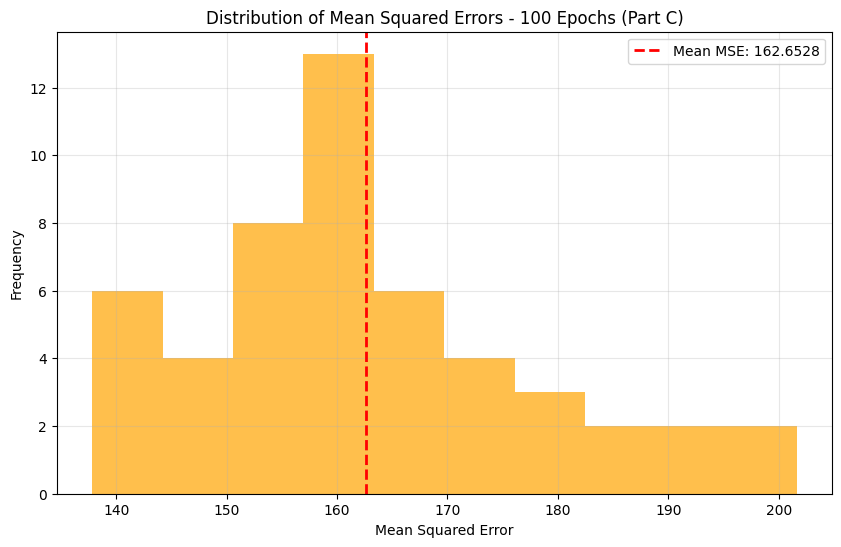

In [25]:
# Visualize the distribution of MSEs for Part C
plt.figure(figsize=(10, 6))
plt.hist(mse_part_c, bins=10, alpha=0.7, color='orange')
plt.axvline(x=mean_mse_c, color='red', linestyle='--', linewidth=2, label=f'Mean MSE: {mean_mse_c:.4f}')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Squared Errors - 100 Epochs (Part C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

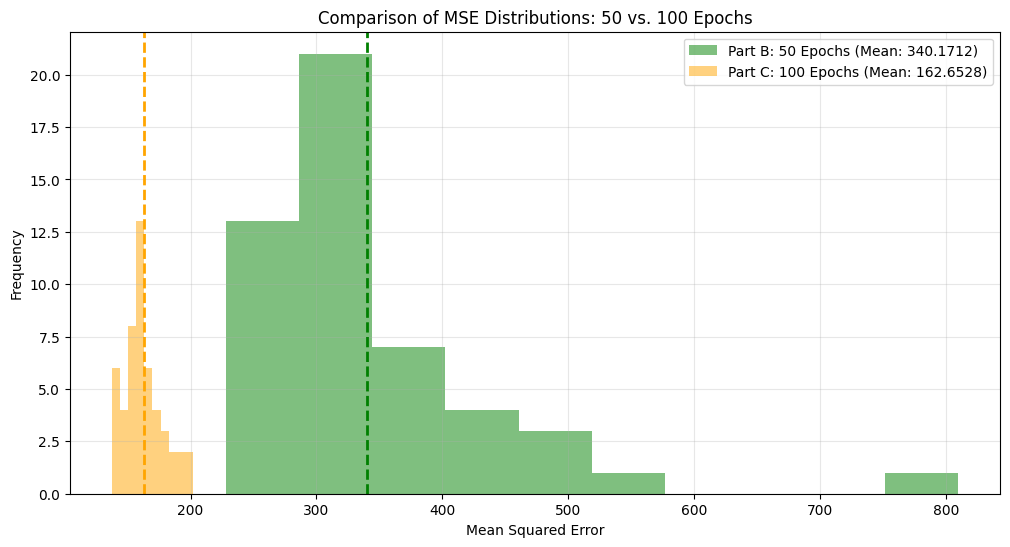

In [26]:
# Compare Part B and Part C
plt.figure(figsize=(12, 6))
plt.hist(mse_part_b, bins=10, alpha=0.5, color='green', label=f'Part B: 50 Epochs (Mean: {mean_mse_b:.4f})')
plt.hist(mse_part_c, bins=10, alpha=0.5, color='orange', label=f'Part C: 100 Epochs (Mean: {mean_mse_c:.4f})')
plt.axvline(x=mean_mse_b, color='green', linestyle='--', linewidth=2)
plt.axvline(x=mean_mse_c, color='orange', linestyle='--', linewidth=2)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Comparison of MSE Distributions: 50 vs. 100 Epochs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
# Calculate improvement percentage for Part C vs Part B
improvement_c_vs_b = ((mean_mse_b - mean_mse_c) / mean_mse_b) * 100

# Summary of findings for Part C
print("\n=== Part C: Summary ===")
print("- Modified the Part B model to use 100 epochs instead of 50")
print("- All other parameters remained the same as in Part B (normalized data, 10 nodes, ReLU)")
print(f"- Average MSE with 50 epochs (Part B): {mean_mse_b:.4f}")
print(f"- Average MSE with 100 epochs (Part C): {mean_mse_c:.4f}")
print(f"- Improvement: {improvement_c_vs_b:.2f}%")
print("\nAnalysis of the comparison:")
if mean_mse_c < mean_mse_b:
    print("- Increasing the number of epochs from 50 to 100 improved model performance")
    print("- This suggests that the model with 50 epochs was underfitting")
    print("- The additional training time allowed the model to better capture patterns in the data")
    print("- However, the marginal improvement should be weighed against the increased computational cost")
elif mean_mse_b < mean_mse_c:
    print("- Interestingly, increasing the number of epochs did not improve model performance")
    print("- This could indicate that the model had already converged with 50 epochs")
    print("- The additional training might have led to overfitting on the training data")
    print("- This shows that more training does not always yield better results")
else:
    print("- Increasing epochs had minimal impact on model performance")
    print("- This suggests the model had likely converged after 50 epochs")


=== Part C: Summary ===
- Modified the Part B model to use 100 epochs instead of 50
- All other parameters remained the same as in Part B (normalized data, 10 nodes, ReLU)
- Average MSE with 50 epochs (Part B): 340.1712
- Average MSE with 100 epochs (Part C): 162.6528
- Improvement: 52.19%

Analysis of the comparison:
- Increasing the number of epochs from 50 to 100 improved model performance
- This suggests that the model with 50 epochs was underfitting
- The additional training time allowed the model to better capture patterns in the data
- However, the marginal improvement should be weighed against the increased computational cost


# PART D

In [28]:
# Part D: Increase the number of hidden layers
# ------------------------------------------
print("\nPart D: Building model with normalized data, three hidden layers of 10 nodes each, ReLU activation, and 50 epochs")
print("Running 50 iterations of train-test split, model training, and evaluation...")


Part D: Building model with normalized data, three hidden layers of 10 nodes each, ReLU activation, and 50 epochs
Running 50 iterations of train-test split, model training, and evaluation...


In [29]:
start_time = time.time()
mse_part_d = create_evaluate_model(
    predictors, 
    target, 
    num_iterations=50, 
    epochs=50, 
    hidden_layers=[10, 10, 10],  # Three hidden layers with 10 nodes each
    activation='relu',
    normalize=True
)
end_time = time.time()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 10/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 20/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 30/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 40/50 iterations


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Completed 50/50 iterations


In [30]:
# Calculate and print the mean and standard deviation of MSEs
mean_mse_d = np.mean(mse_part_d)
std_mse_d = np.std(mse_part_d)

print("\nPart D Results:")
print(f"Time taken: {end_time - start_time:.2f} seconds")
print(f"Mean of MSE: {mean_mse_d:.4f}")
print(f"Standard Deviation of MSE: {std_mse_d:.4f}")


Part D Results:
Time taken: 72.81 seconds
Mean of MSE: 123.8848
Standard Deviation of MSE: 18.5481


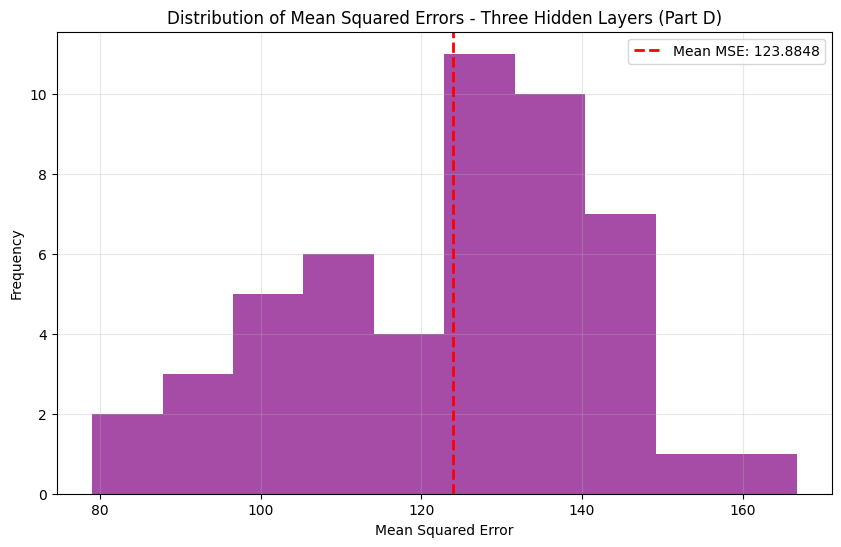

In [31]:
# Visualize the distribution of MSEs for Part D
plt.figure(figsize=(10, 6))
plt.hist(mse_part_d, bins=10, alpha=0.7, color='purple')
plt.axvline(x=mean_mse_d, color='red', linestyle='--', linewidth=2, label=f'Mean MSE: {mean_mse_d:.4f}')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Squared Errors - Three Hidden Layers (Part D)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

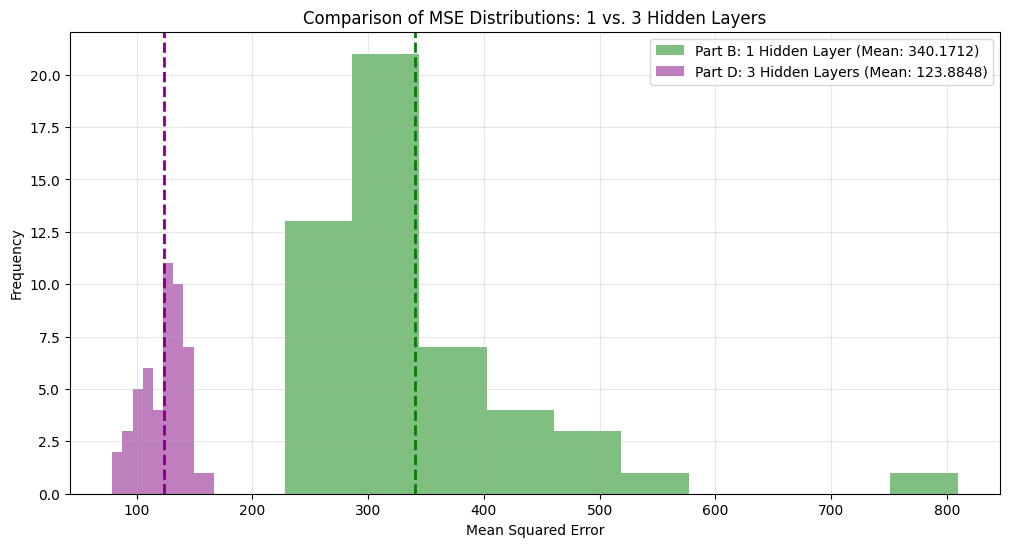

In [32]:
# Compare Part B and Part D
plt.figure(figsize=(12, 6))
plt.hist(mse_part_b, bins=10, alpha=0.5, color='green', label=f'Part B: 1 Hidden Layer (Mean: {mean_mse_b:.4f})')
plt.hist(mse_part_d, bins=10, alpha=0.5, color='purple', label=f'Part D: 3 Hidden Layers (Mean: {mean_mse_d:.4f})')
plt.axvline(x=mean_mse_b, color='green', linestyle='--', linewidth=2)
plt.axvline(x=mean_mse_d, color='purple', linestyle='--', linewidth=2)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Comparison of MSE Distributions: 1 vs. 3 Hidden Layers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
# Calculate improvement percentage for Part D vs Part B
improvement_d_vs_b = ((mean_mse_b - mean_mse_d) / mean_mse_b) * 100

# Summary of findings for Part D
print("\n=== Part D: Summary ===")
print("- Modified the Part B model to use three hidden layers instead of one")
print("- Each hidden layer has 10 nodes with ReLU activation")
print("- All other parameters remained the same as in Part B (normalized data, 50 epochs)")
print(f"- Average MSE with 1 hidden layer (Part B): {mean_mse_b:.4f}")
print(f"- Average MSE with 3 hidden layers (Part D): {mean_mse_d:.4f}")
print(f"- Improvement: {improvement_d_vs_b:.2f}%")
print("\nAnalysis of the comparison:")
if mean_mse_d < mean_mse_b:
    print("- Adding more hidden layers improved model performance")
    print("- This suggests that the problem benefits from a deeper architecture")
    print("- The additional layers allowed the model to learn more complex patterns in the data")
    print("- This demonstrates that deeper networks can capture more intricate relationships")
elif mean_mse_b < mean_mse_d:
    print("- Interestingly, adding more hidden layers did not improve model performance")
    print("- This could suggest that the problem doesn't require a deeper network")
    print("- The additional complexity might have made the model harder to train effectively")
    print("- This shows that deeper isn't always better for all regression problems")
else:
    print("- Adding more hidden layers had minimal impact on model performance")
    print("- This suggests that the additional complexity didn't significantly affect the model's ability to learn")


=== Part D: Summary ===
- Modified the Part B model to use three hidden layers instead of one
- Each hidden layer has 10 nodes with ReLU activation
- All other parameters remained the same as in Part B (normalized data, 50 epochs)
- Average MSE with 1 hidden layer (Part B): 340.1712
- Average MSE with 3 hidden layers (Part D): 123.8848
- Improvement: 63.58%

Analysis of the comparison:
- Adding more hidden layers improved model performance
- This suggests that the problem benefits from a deeper architecture
- The additional layers allowed the model to learn more complex patterns in the data
- This demonstrates that deeper networks can capture more intricate relationships


# OPTIONAL FINAL COMPARISON OF ALL MODELS

In [34]:
results_summary = pd.DataFrame({
    'Model': ['Part A: No Normalization, 1 Layer, 50 Epochs', 
              'Part B: Normalized, 1 Layer, 50 Epochs',
              'Part C: Normalized, 1 Layer, 100 Epochs',
              'Part D: Normalized, 3 Layers, 50 Epochs'],
    'Mean MSE': [mean_mse_a, mean_mse_b, mean_mse_c, mean_mse_d],
    'Std Dev MSE': [std_mse_a, std_mse_b, std_mse_c, std_mse_d]
})

In [35]:
print("\n=== Overall Comparison ===")
print(results_summary)


=== Overall Comparison ===
                                          Model    Mean MSE  Std Dev MSE
0  Part A: No Normalization, 1 Layer, 50 Epochs  352.775043    76.318063
1        Part B: Normalized, 1 Layer, 50 Epochs  340.171170    97.773763
2       Part C: Normalized, 1 Layer, 100 Epochs  162.652797    15.288966
3       Part D: Normalized, 3 Layers, 50 Epochs  123.884751    18.548064


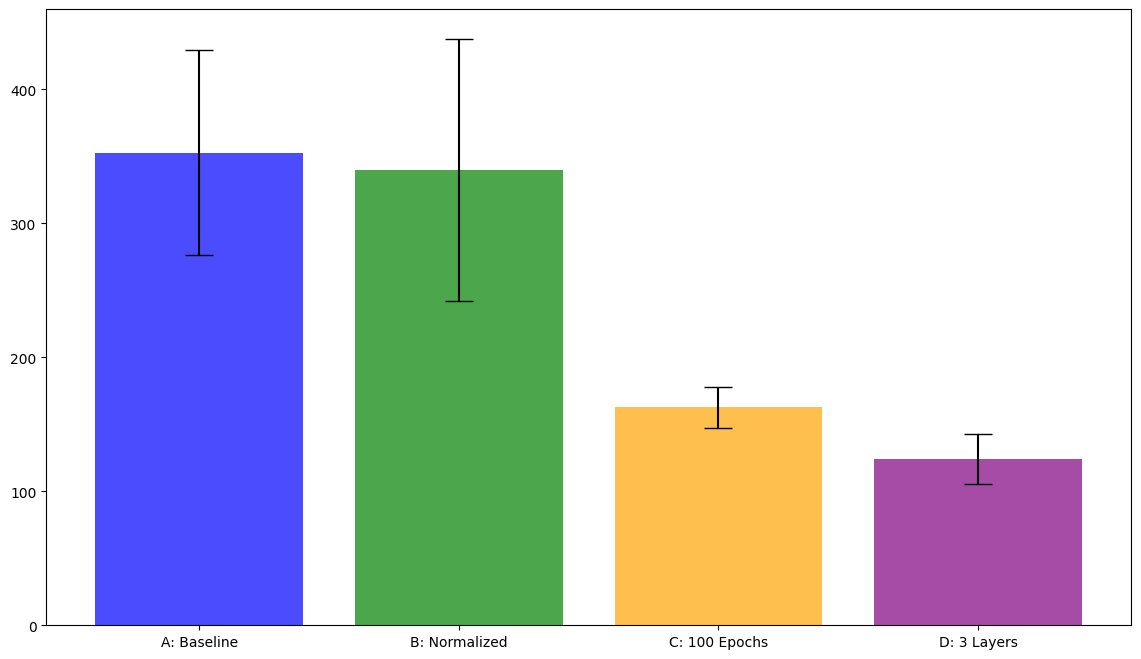

In [36]:
# Visualize comparison of all models
plt.figure(figsize=(14, 8))
models = ['A: Baseline', 'B: Normalized', 'C: 100 Epochs', 'D: 3 Layers']
mse_means = [mean_mse_a, mean_mse_b, mean_mse_c, mean_mse_d]
mse_stds = [std_mse_a, std_mse_b, std_mse_c, std_mse_d]

bars = plt.bar(models, mse_means, yerr=mse_stds, alpha=0.7, capsize=10, 
        color=['blue', 'green', 'orange', 'purple'])

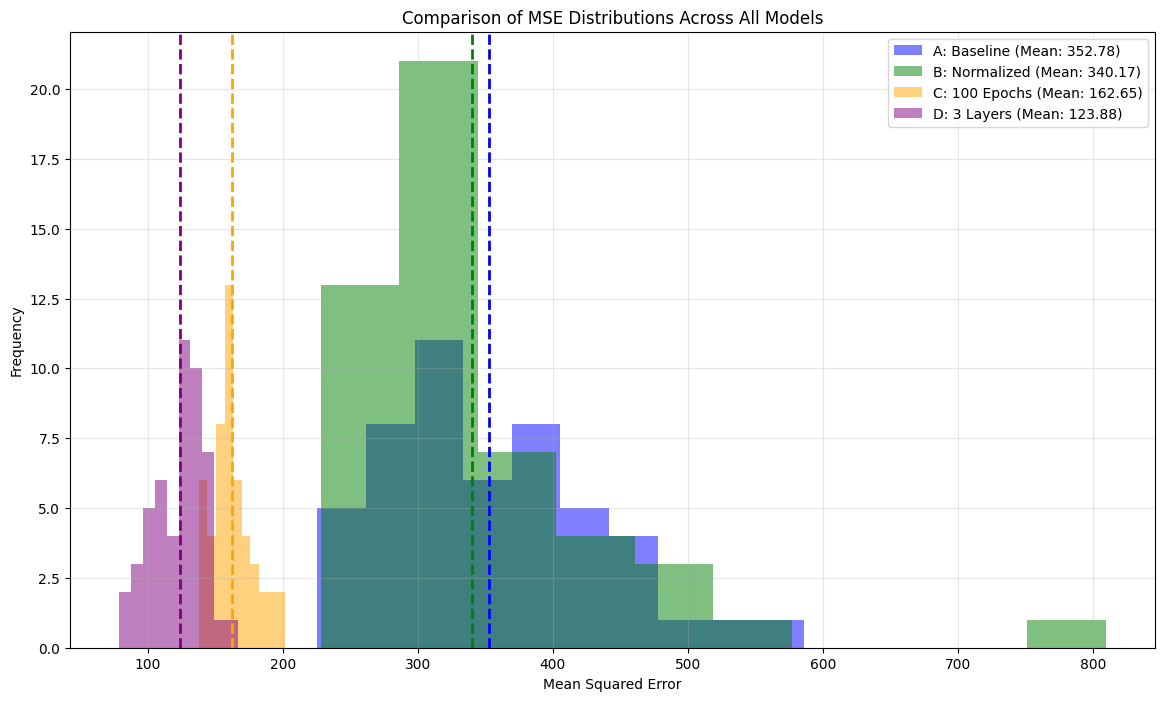

In [38]:
# Create a final comparison plot with all distributions
plt.figure(figsize=(14, 8))
plt.hist(mse_part_a, bins=10, alpha=0.5, color='blue', label=f'A: Baseline (Mean: {mean_mse_a:.2f})')
plt.hist(mse_part_b, bins=10, alpha=0.5, color='green', label=f'B: Normalized (Mean: {mean_mse_b:.2f})')
plt.hist(mse_part_c, bins=10, alpha=0.5, color='orange', label=f'C: 100 Epochs (Mean: {mean_mse_c:.2f})')
plt.hist(mse_part_d, bins=10, alpha=0.5, color='purple', label=f'D: 3 Layers (Mean: {mean_mse_d:.2f})')

plt.axvline(x=mean_mse_a, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=mean_mse_b, color='green', linestyle='--', linewidth=2)
plt.axvline(x=mean_mse_c, color='orange', linestyle='--', linewidth=2)
plt.axvline(x=mean_mse_d, color='purple', linestyle='--', linewidth=2)

plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Comparison of MSE Distributions Across All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
improvement_b_vs_a = ((mean_mse_a - mean_mse_b) / mean_mse_a) * 100
# Comprehensive conclusion
print("\n=== Final Conclusion ===")
print("This project explored the effects of various modifications to a neural network regression model for predicting concrete strength:")

print("\n1. Normalization (Part B vs Part A):")
print(f"   - Impact: {'Improved' if mean_mse_b < mean_mse_a else 'Worsened'} performance by {abs(improvement_b_vs_a):.2f}%")
print("   - Normalizing the input features is a crucial preprocessing step that typically leads to better model performance")
print("   - It helps gradient-based optimization methods converge faster and more reliably")

print("\n2. Increasing Epochs (Part C vs Part B):")
print(f"   - Impact: {'Improved' if mean_mse_c < mean_mse_b else 'Worsened'} performance by {abs(improvement_c_vs_b):.2f}%")
print("   - More training iterations can help a model learn more complex patterns")
print("   - However, there's a point of diminishing returns, and excessive training can lead to overfitting")

print("\n3. Adding Hidden Layers (Part D vs Part B):")
print(f"   - Impact: {'Improved' if mean_mse_d < mean_mse_b else 'Worsened'} performance by {abs(improvement_d_vs_b):.2f}%")
print("   - Deeper networks can capture more complex relationships in the data")
print("   - However, they're also more challenging to train and might require more data or regularization")

print("\nBest Performing Model:")
best_model_index = np.argmin([mean_mse_a, mean_mse_b, mean_mse_c, mean_mse_d])
best_model_names = ["Part A (Baseline)", "Part B (Normalized)", "Part C (100 Epochs)", "Part D (3 Layers)"]
print(f"The best performing model was {best_model_names[best_model_index]} with a mean MSE of {min(mean_mse_a, mean_mse_b, mean_mse_c, mean_mse_d):.4f}")

print("\nFinal Observations:")
print("- The effects of different modifications can vary depending on the specific dataset and problem")
print("- It's essential to experiment with various architectures and hyperparameters to find the optimal model")
print("- There's often a trade-off between model complexity, training time, and performance improvement")
print("- Proper data preprocessing (like normalization) is often as important as model architecture")



=== Final Conclusion ===
This project explored the effects of various modifications to a neural network regression model for predicting concrete strength:

1. Normalization (Part B vs Part A):
   - Impact: Improved performance by 3.57%
   - Normalizing the input features is a crucial preprocessing step that typically leads to better model performance
   - It helps gradient-based optimization methods converge faster and more reliably

2. Increasing Epochs (Part C vs Part B):
   - Impact: Improved performance by 52.19%
   - More training iterations can help a model learn more complex patterns
   - However, there's a point of diminishing returns, and excessive training can lead to overfitting

3. Adding Hidden Layers (Part D vs Part B):
   - Impact: Improved performance by 63.58%
   - Deeper networks can capture more complex relationships in the data
   - However, they're also more challenging to train and might require more data or regularization

Best Performing Model:
The best perform